<a href="https://colab.research.google.com/github/dhyannnn/2030-Assignments/blob/main/Exercise%2014%20-%20MCMCs%20for%20continuous%20variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Dhyan Thakkar__
<br>
Date: Feb. 11, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 14: MCMCs for continuous variables</font></center>

## <font color=#46769B>Introduction</font>

Our goals for this notebook are:
- Gain familiarity with MCMC methods.
- Implement the Metropolis MCMC algorithm for some familiar PDFs

Required reading:
- *Lesson 7: MCMCs for continuous variables*


## <font color=#46769B>Part (a)</font>

In Exercise 7, we introduced the following PDF describing the photon energy emitted from a blackbody:
$$P(E) = \left\{ \begin{array}{cc} \frac{A E^2}{(k_B T)^3} \left(e^{\frac{E}{k_B T}} -1 \right)^{-1} & {\rm for} \; E \ge 0 \\
0 & {\rm otherwise} \end{array} \right. \, ,$$
where $k_B$ is Boltzmann's constant and $A = 0.415954$ is a numerical constant. You may take $k_B T = 1$ in your analysis.

- Write a code implementing the Metropolis MCMC algorithm, generate $N = 10^5$ samples for $E$ from $P(E)$.
    - Use a normal distribution for the transition PDF $Q(E|E^\prime)$.
    - You are free to choose the starting element of your chain, $E_0$, and the width of your transition PDF, $\sigma_q$.

- Plot the first 1000 entries in your chain, $E_i$ vs $i$. Choose a value of $E_0$ such that there is no burn-in period in your chain.

- Calculate the __acceptance fraction__ of your chain. The acceptance fraction is
$$f_{\rm accept} = \frac{N_{\rm accept}}{N}$$
where $N_{\rm accept}$ is the number of times your algorithm accepts the new sample during the acceptance/rejection step.
Tune the value of $\sigma_q$ so that the acceptance fraction of your chain is in the range $30-50\%$.

- Plot a histogram of your samples and compare to the PDF $P(E)$.

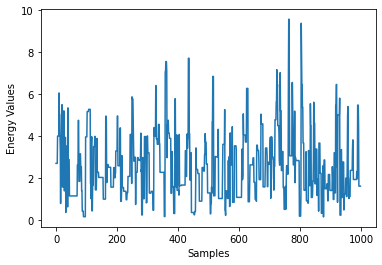

The accceptance rate is:  34.381 %


In [65]:
import numpy as np
import matplotlib.pyplot as plt

A = 0.415954
KbT = 1
num = 10**5
E0 = 2.7
sigma_q = 5
def P(E): 
  return np.where((E >= 0),((A*E**2)/(np.e**E -1)), 0)

# Initialize the first value in the chain [E0]
E_samples = [E0]
i = []
N_accept= []
for k in range(num-1):
    
    # Previous value of E
    E_old = E_samples[k]
    
    # Sample new value of E
    E_new = np.random.normal(E_old,sigma_q)
    
    # Acceptance ratio
    a = P(E_new)/P(E_old)
    
    # Check whether accept or reject
    
    # Accept always
    if a > 1:
        E_samples.append(E_new)
        N_accept.append(E_new)
    
    # Accept with probability a
    else:
        # Randomly decide to accept
        r = np.random.rand()
        if r < a:
            E_samples.append(E_new)
            N_accept.append(E_new)
        else:
            E_samples.append(E_old)
    i.append(k)

plt.plot(i[0:999],E_samples[0:999])
plt.xlabel("Samples")
plt.ylabel("Energy Values")
plt.show()

# Finding the acceptance rate 
f_accept = (len(N_accept)/num) * 100
print('The accceptance rate is: ', f_accept, "%")

The true mean and standard deviation is 2.702790924401368 and  1.7482825209819457 respectively
Our estimated mean is 2.6904796500305195
Our estimated standard deviation is 1.7441278759185654


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


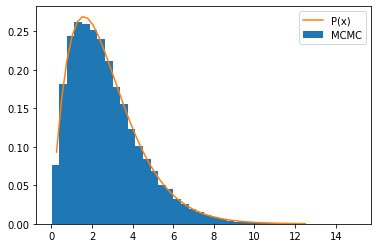

In [68]:
print("The true mean and standard deviation is", 2.702790924401368, "and ",1.7482825209819457, "respectively")
print("Our estimated mean is", np.mean(E_samples))
print("Our estimated standard deviation is", np.std(E_samples))

# Plot a histogram of our sample
plt.hist(E_samples,bins=40,density=True,label='MCMC')

# Compare to our PDF
x = np.linspace(0,12.5)
plt.plot(x,P(x),label='P(x)')

plt.legend()
plt.show()

## <font color=#46769B>Part (b)</font>

In Exercise 8, we introduced the following PDF describing the electron energy emitted in neutron decay:
$$P(E) = \left\{ \begin{array}{cl} A E \sqrt{E^2 - E_m^2} (E_{\rm max} - E)^2 & {\rm for} \; E_m \le E \le E_{\rm max} \\
0 & {\rm otherwise} \end{array} \right. \, ,$$
where the minimum electron energy is given by its rest mass energy $E_m = 0.511$ MeV and the maximum available energy is $E_{\rm max} = 1.292$ MeV. $A = 17.661$ is a normalizing constant.

Follow the same steps as in part (a) for this PDF.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


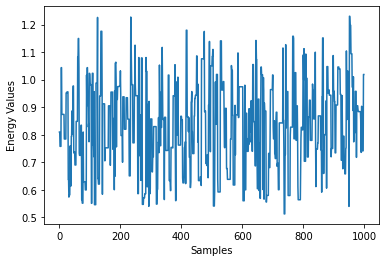

The accceptance rate is:  38.235 %


In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
A2 = 17.661
Emax = 1.292
Em = 0.511
E00 = 0.81
sigma_q2 =  0.5
def P2(E):
  return np.where( (E >= Em) & (E <= Emax ), A2*E * np.sqrt(E**2 - Em**2)* (Emax-E)**2, 0)

# Initialize the first value in the chain [E0]
E_samples2 = [E00]
i2 = []
N_accept2= []

for s in range(num-1):
    
    # Previous value of E
    E_old2 = E_samples2[s]
    
    # Sample new value of E
    E_new2 = np.random.normal(E_old2,sigma_q2)
    
    # Acceptance ratio
    a2 = P2(E_new2)/P2(E_old2)
    
    # Check whether accept or reject
    
    # Accept always
    if a2 > 1:
        E_samples2.append(E_new2)
        N_accept2.append(E_new2)
    
    # Accept with probability a
    else:
        # Randomly decide to accept
        r2 = np.random.rand()
        if r2 < a2:
            E_samples2.append(E_new2)
            N_accept2.append(E_new2)
        else:
            E_samples2.append(E_old2)
    i2.append(s)

plt.plot(i2[0:999],E_samples2[0:999])
plt.xlabel("Samples")
plt.ylabel("Energy Values")
plt.show()

# Finding the acceptance rate 
f_accept2 = (len(N_accept2)/num) * 100
print('The accceptance rate is: ', f_accept2, "%")

The true mean and standard deviation is 0.8138377034065812 and  0.1596646956939711 respectively
Our estimated mean is 0.8117764933759134
Our estimated standard deviation is 0.16180271004933205


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


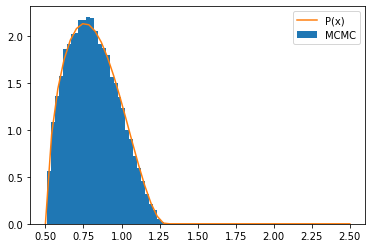

In [62]:
print("The true mean and standard deviation is", 0.8138377034065812, "and ",0.1596646956939711, "respectively")
print("Our estimated mean is", np.mean(E_samples2))
print("Our estimated standard deviation is", np.std(E_samples2))

# Plot a histogram of our sample
plt.hist(E_samples2,bins=30,density=True,label='MCMC')

# Compare to our PDF
x2 = np.linspace(0.5,2.5)
plt.plot(x2,P2(x2),label='P(x)')

plt.legend()
plt.show()